In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-26 20:59:25.227079: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-26 20:59:25.257101: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-26 20:59:25.747813: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [27]:
#Coletando dados


###########
#Para refazer esse tem que somar os dados de Bagre_bandeira_art dos anos para prever com Bagre_art e depois apagar Bagre_bandeira_art

###########


df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Siluriformes/Desagregações- RJ_Reconstrucao_Siluriformes_2024_08_20.xlsx')

dados = df[['Ano', 'Bagre_bandeira_art', 'Bagre_art']].dropna().reset_index(drop=True)



#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Bagre_bandeira_art'] = dados.loc[i,'Bagre_bandeira_art'] / dados.loc[i,'Bagre_art']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1962,1963,1964,1966,1971,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop= dados['Prop_Bagre_bandeira_art'].values
dados.head()


,Ano,Bagre_bandeira_art,Bagre_art,Prop_Bagre_bandeira_art
0,2015,0.2650,13.62300,0.019452
1,2017,5.5220,28.69305,0.192451
2,2018,7.9838,46.76420,0.170725
3,2019,10.1999,67.93711,0.150137
4,2020,3.3465,34.10145,0.098134


In [28]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std


In [22]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=5, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Siluriformes/Bagre_bandeira/pesos prop art/.weights.h5', overwrite=True)

Epoch 1/5


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9978
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9628
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9392
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9142
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8886


In [20]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Siluriformes/Bagre_bandeira/pesos prop art/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.02235622]
 [0.02386201]
 [0.02536786]
 [0.02837951]
 [0.03590859]
 [0.04344007]
 [0.04494638]
 [0.04645265]
 [0.04795895]
 [0.04946526]
 [0.05097156]
 [0.05247784]
 [0.05398415]
 [0.05549045]
 [0.05699673]
 [0.05850304]
 [0.06000933]
 [0.0615156 ]
 [0.06302165]
 [0.07205798]
 [0.07356404]
 [0.07507009]
 [0.07657614]
 [0.07808243]
 [0.07959387]
 [0.08110778]
 [0.08262771]
 [0.08415362]
 [0.0856838 ]
 [0.08721411]
 [0.08874442]
 [0.09028283]
 [0.0918223 ]
 [0.09336875]
 [0.09491766]
 [0.09647389]
 [0.09804064]
 [0.099641  ]
 [0.10130279]]


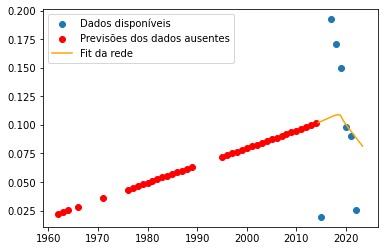

In [29]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

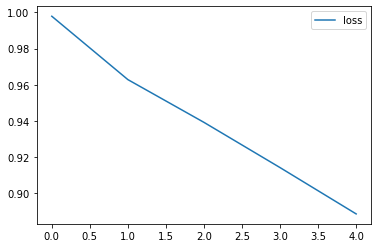

In [24]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [31]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1


df_preenchido = df[['Ano','Bagre_bandeira_art']]
for i in range(len(prev_continua)):
    if i+1950 in anos_para_prever:
      df_preenchido.loc[i,'Bagre_bandeira_art']=df.loc[i,'Bagre_art']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Siluriformes/Bagre_bandeira/Desagregação Bagre_bandeira_art.xlsx')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
     Ano  Bagre_bandeira_art
0   1950                 NaN
1   1951                 NaN
2   1952                 NaN
3   1953                 NaN
4   1954                 NaN
5   1955                 NaN
6   1956                 NaN
7   1957                 NaN
8   1958                 NaN
9   1959                 NaN
10  1960                 NaN
11  1961                 NaN
12  1962           13.405313
13  1963           16.787498
14  1964           18.285654
15  1965                 NaN
16  1966           16.210009
17  1967                 NaN
18  1968                 NaN
19  1969                 NaN
20  1970                 NaN
21  1971           17.257050
22  1972                 NaN
23  1973                 NaN
24  1974                 NaN
25  1975                 NaN
26  1976            2.903906
27  1977           14.606460
28  1978           42.922249
29  1979            4.508142
30  1980           11.228613
31  1981           30.531965
32  1